EDA GOOGLE

In [56]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [57]:
estados_concatenados=pd.read_csv('estados_concatenados_clear.csv', index_col=False)

In [58]:
estados_concatenados.drop('Unnamed: 0', axis=1, inplace=True)

In [59]:
estados_concatenados

,user_id,name,rating,gmap_id,nombre_estado,resp_text,fecha_anho_mes,anho,sentiment_numeric
0,1.064184e+20,Zipperand Stitch,3,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,1,2021-08-30,2021,2
1,1.125366e+20,Chris Clark,3,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,1,2021-08-17,2021,2
2,1.181066e+20,Thomas Landers,5,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,1,2021-08-22,2021,2
3,1.059758e+20,M.G. Sturm,1,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,1,2021-08-14,2021,0
4,1.089426e+20,Deborah pellem,5,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,1,2021-08-28,2021,1
...,...,...,...,...,...,...,...,...,...
2840174,1.066896e+20,Nancy Schaffer,5,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,1,2017-11-30,2017,1
2840175,1.019377e+20,Mackenzie Mayer,2,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,1,2018-06-30,2018,1
2840176,1.087467e+20,Walter Orum,5,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,1,2017-04-05,2017,1
2840177,1.124218e+20,Charissa Carver,5,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,1,2019-04-25,2019,1


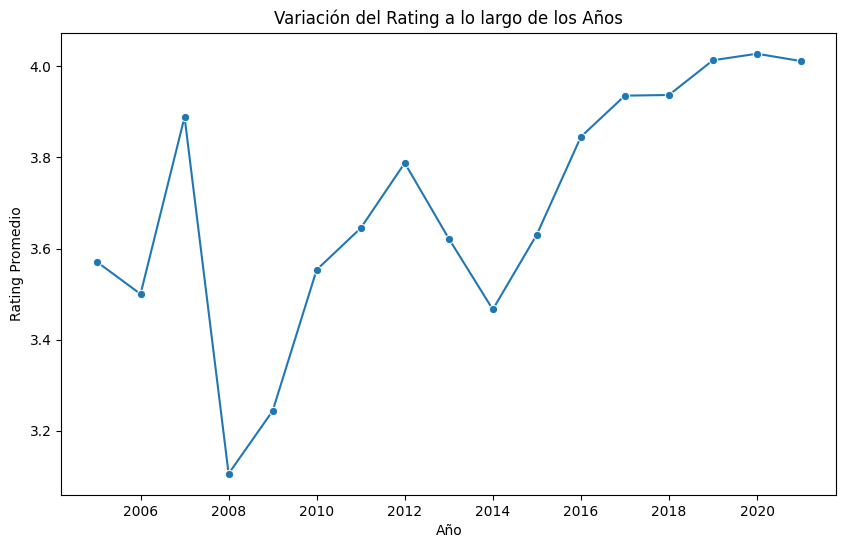

In [60]:
# Calculamos la media de los ratings para cada año
media_ratings_por_anho = estados_concatenados.groupby('anho')['rating'].mean().reset_index()

# Creamos el gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(x='anho', y='rating', data=media_ratings_por_anho, marker='o')
plt.title('Variación del Rating a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Rating Promedio')
plt.show()




En el gráfico presentado, se evidencia que el rating de los establecimientos de comida rápida en los Estados Unidos ha experimentado fluctuaciones a lo largo de los años. No obstante, a partir del año 2014, se observa una tendencia sostenida al alza. Este comportamiento sugiere la posibilidad de una mejora continua en el nivel de servicio proporcionado por dichos establecimientos durante ese período.

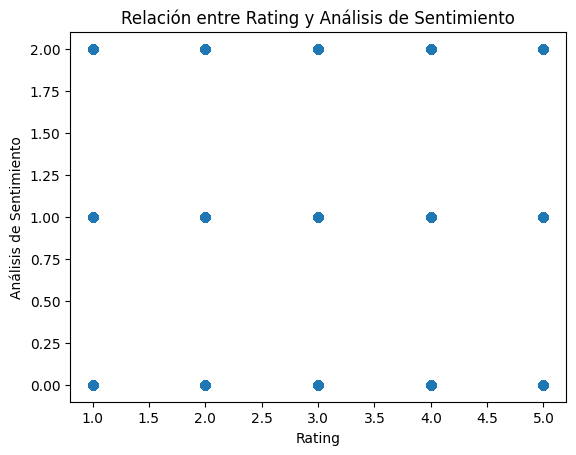

In [61]:
# Gráfico de dispersión
plt.scatter(estados_concatenados['rating'], estados_concatenados['sentiment_numeric'])
plt.title('Relación entre Rating y Análisis de Sentimiento')
plt.xlabel('Rating')
plt.ylabel('Análisis de Sentimiento')
plt.show()


Se puede observar que la disposición horizontal de las variables Rating y Análisis de Sentimiento son independientes entre sí, es decir que el valor de una variable no proporciona información predictiva sobre el valor de la otra variable.

C:\Users\belen\AppData\Local\Temp\ipykernel_43740\4260318722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estado', y='Frecuencia', data=top_10_estados, palette='viridis')


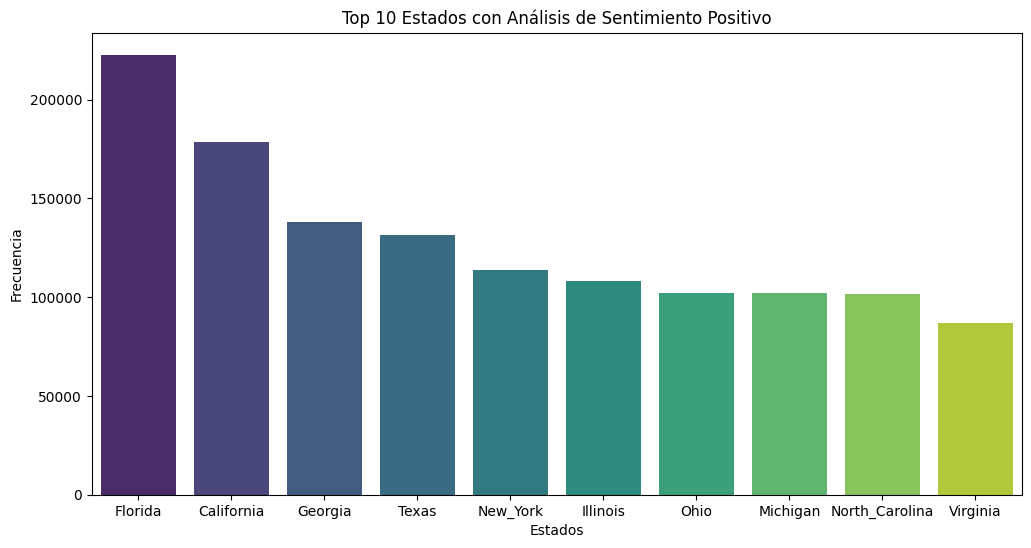

In [62]:
# Filtramos el Df para incluir solo filas con análisis de sentimiento igual a 1 o 2
df_sentiment_positivo = estados_concatenados[estados_concatenados['sentiment_numeric'].isin([1, 2])]

# Luego, contamos la frecuencia de estados con análisis de sentimiento positivo
frecuencia_por_estado = df_sentiment_positivo['nombre_estado'].value_counts().reset_index()
frecuencia_por_estado.columns = ['Estado', 'Frecuencia']

# Ordenamos el Df por frecuencia en orden descendente y tomamos solo los 10 primeros
top_10_estados = frecuencia_por_estado.sort_values(by='Frecuencia', ascending=False).head(10)

# Creamos el gráfico de barras para el top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Estado', y='Frecuencia', data=top_10_estados, palette='viridis')
plt.title('Top 10 Estados con Análisis de Sentimiento Positivo')
plt.xlabel('Estados')
plt.ylabel('Frecuencia')
plt.show()



A partir de la observación detallada de los datos, se evidencia que el estado de Florida posee negocios con las reseñas más positivas, lo que sugiere la posibilidad de que en dicho estado se ofrezcan servicios de la más alta calidad.

In [63]:
import numpy as np
import pandas as pd



# Calcular el 88% de la longitud de la columna 'resp'
porcentaje_cambio = 0.88
cantidad_cambios = int(porcentaje_cambio * len(estados_concatenados['resp_text']))

# Obtener los índices de los valores a cambiar
indices_cambio = np.random.choice(estados_concatenados.index, size=cantidad_cambios, replace=False)

# Cambiar los valores en la columna 'resp' de 1 a 0
estados_concatenados.loc[indices_cambio, 'resp_text'] = 0




In [64]:
estados_concatenados

,user_id,name,rating,gmap_id,nombre_estado,resp_text,fecha_anho_mes,anho,sentiment_numeric
0,1.064184e+20,Zipperand Stitch,3,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,0,2021-08-30,2021,2
1,1.125366e+20,Chris Clark,3,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,0,2021-08-17,2021,2
2,1.181066e+20,Thomas Landers,5,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,0,2021-08-22,2021,2
3,1.059758e+20,M.G. Sturm,1,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,0,2021-08-14,2021,0
4,1.089426e+20,Deborah pellem,5,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,0,2021-08-28,2021,1
...,...,...,...,...,...,...,...,...,...
2840174,1.066896e+20,Nancy Schaffer,5,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,0,2017-11-30,2017,1
2840175,1.019377e+20,Mackenzie Mayer,2,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,0,2018-06-30,2018,1
2840176,1.087467e+20,Walter Orum,5,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,0,2017-04-05,2017,1
2840177,1.124218e+20,Charissa Carver,5,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,0,2019-04-25,2019,1


In [65]:
estados_concatenados['resp_text'].value_counts()

resp_text
0    2499357
1     340822
Name: count, dtype: int64

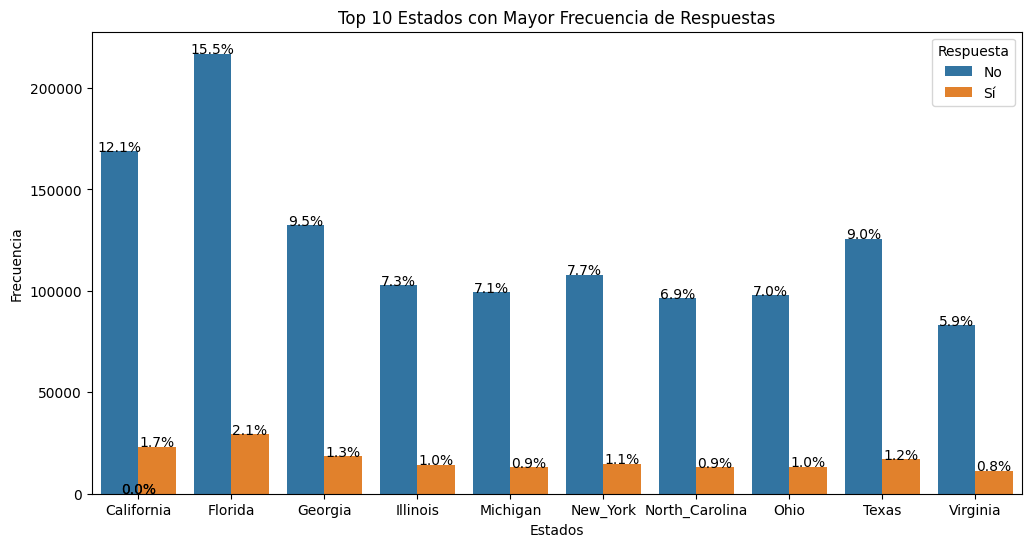

In [66]:
# Filtrar solo las respuestas respuestas  (valor 1)
respuestas = estados_concatenados[estados_concatenados['resp_text'] == 1]

# Seleccionamos los 10 estados con más respuestas 
top_10_estados = respuestas['nombre_estado'].value_counts().nlargest(10).index

# Filtrar el Df para incluir solo los top 10 estados
df_top_10 = estados_concatenados[estados_concatenados['nombre_estado'].isin(top_10_estados)]

# Calculamos el porcentaje de respuestas por estado
porcentaje_por_estado = (df_top_10.groupby('nombre_estado')['resp_text'].mean() * 100).reset_index()
porcentaje_por_estado.columns = ['Estado', 'Porcentaje Positivo']

# Crear un gráfico de barras para mostrar la frecuencia de respuestas por estado
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='nombre_estado', hue='resp_text', data=df_top_10)
plt.title('Top 10 Estados con Mayor Frecuencia de Respuestas')
plt.xlabel('Estados')
plt.ylabel('Frecuencia')
plt.legend(title='Respuesta', labels=['No', 'Sí'])

# Agregar porcentaje a las barras
for p in ax.patches:
    porcentaje = '{:.1f}%'.format(p.get_height() / len(df_top_10) * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.text(x, y, porcentaje, ha='center')

plt.show()


La observación del gráfico destaca de manera notable que los estados de Florida, California, Georgia, Texas y Nueva York son los territorios donde los restaurantes de comida rápida exhiben una respuesta notablemente mayor a los usuarios que brindan retroalimentación en la plataforma de Google. Este fenómeno sugiere un nivel elevado de compromiso y capacidad de respuesta por parte de los negocios en dichos estados, indicando una actitud proactiva hacia la atención al cliente y la gestión de la retroalimentación de los usuarios en la mencionada plataforma. Este hallazgo puede ser indicativo de una cultura empresarial enfocada en la satisfacción del cliente y la mejora continua en estas regiones geográficas específicas.

C:\Users\belen\AppData\Local\Temp\ipykernel_43740\1384695687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nombre_estado', data=estados_concatenados, palette='viridis', order=estados_concatenados['nombre_estado'].value_counts().index)


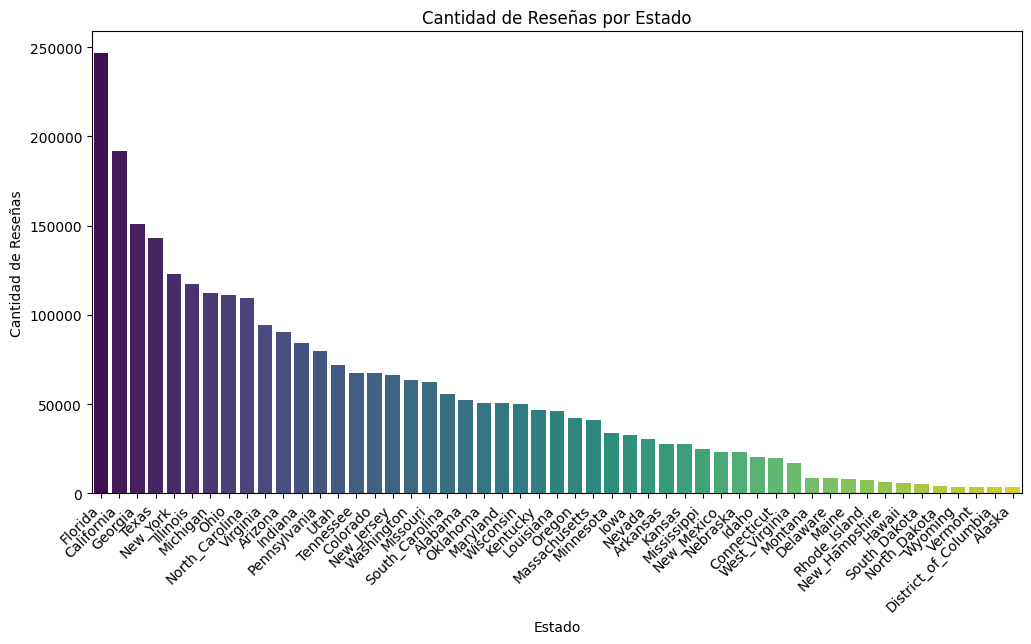

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(x='nombre_estado', data=estados_concatenados, palette='viridis', order=estados_concatenados['nombre_estado'].value_counts().index)
plt.title('Cantidad de Reseñas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=45, ha='right')
plt.show()


En el gráfico presentado, se observa claramente que los estados de Florida, California, Georgia, Texas y Nueva York destacan significativamente en términos de la cantidad de reseñas dejadas por los usuarios sobre los negocios. Esto sugiere que los usuarios en estos estados son particularmente participativos en expresar sus opiniones y experiencias dejando una retroalimentación sobre los negocios en dichas regiones geográficas.





